In [ ]:

## try this , its faster

import os
import sys
import torch
!pip install fvcore iopath
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 42 kB 174 kB/s 
     |████████████████████████████████| 596 kB 10.5 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=57c59861d3cc155bf125ce59f74e48b5172317fa0f70e5aed90af2cbe41adf12
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=c8a750e32485a761af191dc6350a73764aa47a2f3ed17fb4e0df09289b545043
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built fvcore iopath
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: htt

In [ ]:
## try this if the faster method doesnt work 

import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.10.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0   556k      0 --:--:-- --:--:-- --:--:--  556k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-7vqjtlq4
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-7vqjtlq4
  Running command git checkout -q 2bd65027ca5c3b87b77d4f05b8eacae58d8d106f
     |████████████████████████████████| 50 kB 1.2 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.6.2-cp37-cp37m-linux_x86_64.whl size=30191144 sha256=21c113c4969bc2

In [ ]:
import os
import torch
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# from plot_image_grid import image_grid
from pytorch3d.utils import ico_sphere
#import numpy as np
import cupy as np
from tqdm import tqdm
import scipy
# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, save_obj
# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib

# add path for demo utils functions
import sys
import os
sys.path.append(os.path.abspath(''))

# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")



In [ ]:
"""
## Doesnt work on colab but works on local enviroment.
## Use this code to select the handle vertices or choose frozen/deforming vertices .
## it opens a visualiser to select vertices using a bounding box created by the mouse.


import open3d as o3d
import inspect 
from collections import defaultdict

def select_vert(mesh, edit=False):
    vis = o3d.visualization.VisualizerWithVertexSelection() if not edit else o3d.visualization.VisualizerWithEditing()
    vis.create_window()
    vis.add_geometry(mesh)
    vis.run()
    vis.destroy_window()
    
    return vis.get_picked_points()


mesh = o3d.io.read_triangle_mesh('originalMesh.obj')

selected_verts = select_vert(mesh)

## add delta
# def deform_verts_rand()
points =[]
for point in selected_verts:
	# print(type(point.index),type(point.coord),point.coord.shape,point.coord[0])
	# remove_points = o3d.geometry.TriangleMesh.remove_vertices_by_mask(point.index)
	points.append(point.index)
	# print(f'{point.index} ({point.coord})')

anchor_verts_idx = points

"""  

"\n## Doesnt work on colab but works on local enviroment.\n## Use this code to select the handle vertices or choose frozen/deforming vertices .\n## it opens a visualiser to select vertices using a bounding box created by the mouse.\n\n\nimport open3d as o3d\nimport inspect \nfrom collections import defaultdict\n\ndef select_vert(mesh, edit=False):\n    vis = o3d.visualization.VisualizerWithVertexSelection() if not edit else o3d.visualization.VisualizerWithEditing()\n    vis.create_window()\n    vis.add_geometry(mesh)\n    vis.run()\n    vis.destroy_window()\n    \n    return vis.get_picked_points()\n\n\nmesh = o3d.io.read_triangle_mesh('originalMesh.obj')\n\nselected_verts = select_vert(mesh)\n\n## add delta\n# def deform_verts_rand()\nfor point in selected_verts:\n\t#print(type(point.index),type(point.coord),point.coord.shape,point.coord[0])\n\t#remove_points = o3d.geometry.TriangleMesh.remove_vertices_by_mask(point.index)\n\t\n\tprint(f'{point.index} ({point.coord})')\n\n\n"

In [ ]:

obj_filename = "/originalMesh.obj"

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)




# print(mesh.has_verts_normals())   # False

verts = mesh.verts_packed()
faces = mesh.faces_packed()
verts_shape = mesh.verts_packed().shape

center = verts.mean(0)
#print(center)
verts = verts - center
#print(verts[380])

mesh = Meshes(verts=[verts], faces=[faces])



frozen_vert_idx = []
deform_vert_idx = []

# having mesh centered on origin , we only take values on the negetive side of x-axis which is almost half of mesh
for v in range(len(verts)):
  if verts[v][0] <=0:
    frozen_vert_idx.append(v)
    
#vert_indices = [i for i in range(len(all))]
#print(vert_indices)
#print(frozen_vert_idx)

deform_vert_idx = list(set(range(len(verts))) - set(frozen_vert_idx))

#print(deform_vert_idx)
"""
## case 1 
anchor_verts_idx = [1467, 431, 618, 554, 626, 562, 1998, 424, 572, 1450, 571, 390, 442, 575, 639, 506, 1868, 1986, 1464, 613, 1509, 393, 425, 1961, 574, 
                    1029, 615, 573, 428, 433, 1030, 563, 1506, 510, 627, 628, 1449, 389, 1508, 392, 1504, 589, 508, 391, 1468, 561, 625, 1024, 614, 427, 
                    630, 1021, 559, 426, 623, 616, 1859, 505, 1505, 509, 620, 617, 1918, 560, 1023, 624, 1448, 388, 502, 619, 1025, 504, 1519, 507, 429, 
                    1463, 387, 430, 1026, 1022, 622, 386, 503, 631, 498, 385, 621, 1485, 497, 1867, 1860, 612, 1864, 1865, 1976, 1033, 1032, 611, 1861, 
                    432, 1027, 1866, 1863, 1916, 384, 1034, 439, 1862, 610, 1516, 609, 437, 435, 1447, 632, 602, 1917, 1454, 436, 383, 434, 382, 633, 607, 
                    1948, 1453, 1915, 443, 1455, 608, 1919, 381, 604, 359, 362, 380, 1452, 634, 606, 1914, 361, 1446, 351, 1451, 355, 358, 360, 354, 356, 
                    596, 357, 603, 1514, 635, 352, 1515, 367, 638, 605, 1520, 1456, 365, 1457, 636, 368, 1469, 353, 1801, 379, 364, 637, 363, 601, 1950, 
                    1459, 1466, 378, 1517, 600, 1465, 1949, 1518, 599, 366, 377, 1462, 598, 1458, 369, 370, 597, 1512, 1460, 1523, 1513, 376, 438, 594, 
                    1822, 640, 1521, 440, 1522, 595, 372, 374, 1461, 375, 593, 1803, 1978, 1507, 1503, 444, 1821, 371, 441, 373, 1802, 1484, 496, 1031, 592, 
                    1804, 591, 1511, 1510, 1502, 1483, 641, 1979, 1980, 1679, 1969, 1819]   # on the tip of the slimmer end of the liver , taken using Open3d
                    
"""

anchor_verts_idx = [1031, 621, 1987, 626, 381, 620, 1033, 595, 362, 623, 1980, 1915, 1030, 625, 622, 1032, 1982, 360, 1998, 624, 584, 1034, 604, 1451, 1981, 
                    602, 598, 586, 596, 1914, 605, 585, 361, 600, 380, 1448, 599, 1447, 635, 1450, 1449, 434, 636, 1919, 1948, 355, 356, 363, 1949, 358, 1467,
                    379, 359, 354, 353, 601, 603, 637, 607]  # on the tip of the slimmer end of the liver , taken using Open3d                    

mesh_normals = mesh.verts_normals_packed()  ## list of tensors of normals of shape (V_n, 3)
# print("faces",mesh.faces_normals_packed(),"vert ",mesh_normals)

##  moving anchor vertices along the normal direction by some weight

weight = 31

dump =[]

for id in range(len(anchor_verts_idx)):
  
  vert_mesh_user = verts [ anchor_verts_idx[id] ]
  #print(vert_mesh_user)
  
  # print(vert_mesh_user,mesh_normals[ anchor_verts_idx[id] ], 2 * mesh_normals[ anchor_verts_idx[id] ])

  new_vert = vert_mesh_user + (weight * mesh_normals[ anchor_verts_idx[id] ])
  #print(new_vert)

  dump.append(new_vert)

  #user_defined_verts = torch.cat((new_vert,user_defined_verts),dim=0)

user_defined_verts = dump

print(user_defined_verts)  

    

[tensor([139.4485,  -8.1317,  71.8855], device='cuda:0'), tensor([156.3572,  38.3462,  45.8969], device='cuda:0'), tensor([134.4679,  20.5539,  86.4059], device='cuda:0'), tensor([146.1008,  34.7018,  71.2996], device='cuda:0'), tensor([150.2064,  17.0893, -24.6810], device='cuda:0'), tensor([150.6331,  39.7659,  58.0480], device='cuda:0'), tensor([151.2887,  42.5765,  32.0690], device='cuda:0'), tensor([145.3220,  -7.4929,  67.6092], device='cuda:0'), tensor([155.3111,   4.8801, -21.2409], device='cuda:0'), tensor([156.9188,  19.8100,  67.2546], device='cuda:0'), tensor([134.7196,  -1.8215,  81.5403], device='cuda:0'), tensor([131.3700,  24.7793, -46.9111], device='cuda:0'), tensor([142.0632,  19.1413,  82.6887], device='cuda:0'), tensor([150.3217,  11.3783,  74.2509], device='cuda:0'), tensor([163.2110,  21.2057,  55.2938], device='cuda:0'), tensor([167.6488,  20.3941,  40.9195], device='cuda:0'), tensor([132.7989,  23.0112,  87.9369], device='cuda:0'), tensor([141.8958,  19.9968, -4

/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:530: UserWarning:

No mtl file provided



In [ ]:
# get one ring neighbours
from collections import defaultdict

def get_one_ring_neighbours(mesh):
		"""Return a dict, where key i gives a list of all neighbouring vertices (connected by exactly one edge)"""

		all_faces = mesh.faces_padded().cpu().detach().numpy()
		orn = []

		for m,faces in enumerate(all_faces):  # for each mesh
			mapping = defaultdict(set)  # start with sets, to prevent repeats
			for f in faces:
				#print('### this is f',f)
				for j in [0, 1, 2]:  # for each vert in face
					#print('this is j',j) 
					i, k = (j + 1) % 3, (j + 2) % 3  # get 2 other vertices
					#print(' ####  this is i',i,' ####  this is j',j)
					mapping[f[j]].add(f[i])
					mapping[f[j]].add(f[k])

			mapping_out = {k: list(v) for k, v in mapping.items()}  # convert to list for easier torch/numpy integration
			orn.append(mapping_out)

		return orn


def anchor_cost(deformed_mesh):
  
  #anchorcost = torch.tensor(0, dtype=float, device=device,requires_grad=True)
  verts = deformed_mesh.verts_packed()
  anchorcost = 0
  for id in range(len(anchor_verts_idx)):
    deforming_anchor = verts[ anchor_verts_idx[id] ]
    #user_vert_in_space = 200 * user_defined_verts[id]  ## for the sake of test 
    user_vert_in_space = user_defined_verts[id]
    anchorcost +=  torch.linalg.norm(deforming_anchor - user_vert_in_space)
    #print('anchor',anchorcost.is_cuda)
    #anchorcost += ((deforming_anchor - user_vert_in_space).norm(dim=0,p=2)).abs

  return anchorcost


One_ring_Mesh = get_one_ring_neighbours(mesh)


## for some reason this returns a negetive cost
def isometric_cost(deformed_mesh):
    
    total_iso_cost = 0
    
    verts_def = deformed_mesh.verts_packed()
    
    for vert in range(verts_shape[0]):
        
        vert_neighbours = One_ring_Mesh[0][vert]
        #print("vert_neighbours",vert_neighbours)
        
        vert_i = verts[ vert ]
        #print("vert_i",vert_i)

        vert_i_def = verts_def[vert]
        
        for j in range(len(vert_neighbours)):
            vert_j_id = vert_neighbours[j]
            #print("vert_j_id",vert_j_id)
            
            vert_j = verts[vert_j_id]
            #print("vert_j",vert_j)

            vert_j_def = verts_def[vert_j_id]
            #print("vert_j_def",vert_j_def)
            
            total_iso_cost += torch.linalg.norm(vert_i - vert_j,dim =-1).abs() - torch.linalg.norm(vert_i_def - vert_j_def,dim =-1).abs()
            # total_iso_cost.sum() ## completely different cost calculation from above += method
            #print(total_iso_cost)
            #total_iso_cost += (vert_i - vert_j).norm(dim=0, p=2).abs() - (vert_i_def - vert_j_def).norm(dim=0, p=2).abs()
            #print("iso",total_iso_cost)
            
            
    return total_iso_cost







## I implemented my own iso cost calculation but my implementation is almost 
## 25x slower than the one implemented here mainly due to the difference in matrix and 
## vector norm calculations but converges faster.
edges_packed = mesh.edges_packed()  # (sum(E_n), 3)
verts1_packed = mesh.verts_packed()  # (sum(V_n), 3)
edge_to_mesh_idx = mesh.edges_packed_to_mesh_idx()  # (sum(E_n), )
num_edges_per_mesh = mesh.num_edges_per_mesh()  # N

def isometric_cost_fast(mesh2):
    
    verts2_packed = mesh2.verts_packed()  # (sum(V_n), 3)
    
    #weights = num_edges_per_mesh.gather(0, edge_to_mesh_idx)
    #weights = 1.0 / weights.float()

    verts_edges1 = verts1_packed[edges_packed]
    verts_edges2 = verts2_packed[edges_packed]
    
    v0, v1 = verts_edges1.unbind(1)
    u0, u1 = verts_edges2.unbind(1)

    loss = ((v0 - v1).norm(dim=1, p=2).abs() - (u0 - u1).norm(dim=1, p=2)).abs()
    #print(loss.sum())
    #loss = loss * weights
    return loss.sum()



/usr/local/lib/python3.7/dist-packages/pytorch3d/structures/meshes.py:1108: UserWarning:

__floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').



In [ ]:
"""

## cost discrepency check

print("checking discrepency in both costs")

def isometric_cost_test(deformed_mesh):
    
    total_iso_cost = 0
    
    verts_def = deformed_mesh.verts_packed()
    
    for vert in range(verts_shape[0]):
        
        vert_neighbours = One_ring_Mesh[0][vert]
        #print("vert_neighbours",vert_neighbours)
        
        vert_i = verts[ vert ]
        #print("vert_i",vert_i)

        vert_i_def = verts_def[vert]
        
        for j in range(len(vert_neighbours)):
            vert_j_id = vert_neighbours[j]
            #print("vert_j_id",vert_j_id)
            
            vert_j = verts[vert_j_id]
            #print("vert_j",vert_j)

            vert_j_def = verts_def[vert_j_id]
            #print("vert_j_def",vert_j_def)
            
            total_iso_cost += torch.linalg.norm(vert_i_def - vert_j_def,dim =-1).abs()
            #print(total_iso_cost)
            #total_iso_cost.sum()
      
    return total_iso_cost

print("isometric_cost_test",isometric_cost_test(mesh))




def isometric_cost_fast_test(mesh2):
    
    verts2_packed = mesh2.verts_packed()  # (sum(V_n), 3)
    
    #weights = num_edges_per_mesh.gather(0, edge_to_mesh_idx)
    #weights = 1.0 / weights.float()

    verts_edges2 = verts2_packed[edges_packed]

    u0, u1 = verts_edges2.unbind(1)

    loss = (u0 - u1).norm(dim=1, p=2).abs()
    #print(loss.sum())
    #loss = loss * weights
    return loss.sum()



print("isometric_cost_fast_test",isometric_cost_fast_test(mesh))



In [ ]:
X = torch.full(verts_shape, 0.0, device=device, requires_grad=True)


## Splitting parameters to avoid calculating their gradient or making their gradient zero is impossible as far as i have experimented.

## The reason is that the computed graph breaks if you invoke either one of the options.

## The only possible way to make sub-parameters zero or not have their gradient computed is when you pass a complete tensor or pass a
## continous range in the tensor e.g [1:50] it would make the gradient zero or flag set to false for that range. e.g if the tensor
## is of len 100, we can make the first 50 or any continous range as grad_required set to false and rest to true but cannot make 
## individual ones set to specific values

## in our case the vertices ordered on the mesh are chaotic meaning that vertex_id =0 and vertex_id =1000 might be 1 ring neighbours
## therefore it is impossible in this case to set their gradient zero or flag set to false on specific parameters breaking the graph

## Therefore in my implementation i just revert the frozen deformed vertices back to their original positions after the minimisation
## but this would void the loss function calculation since frozen vert postions are accounted for in the total loss.

"""

for i,param in enumerate(X):
    #print("i",i,"param",param)
    #print("before",param.requires_grad)
    if i == frozen_id[i]:
        print(i,frozen_id[i])
        param.requires_grad = True
    else:
        print("shit",i)
        param.requires_grad = False
    
    #if i <= 15:
    #    param.requires_grad = True
    print("after",param.requires_grad)
"""
"""

verts_shape = (4,3)

frozen_id = [0,1,2,5]

X = torch.full(verts_shape, 0.0, device=device,requires_grad=True)
print("ffff",X.grad)

for i,param in enumerate(X):
    #print("before",param.requires_grad)
    if i == frozen_id[i]:
        X[i].register_hook(lambda grad: grad * 0)
    print(X.grad)
    
 
    
h = X.register_hook(lambda grad: grad * 0)  
y = torch.full(verts_shape,1.0,device=device)
X.backward(y)
print(X.grad)

"""

# with torch.no_grad():
# X = X[2009:].norm() python

#X_deformable = torch.full(verts_shape_deformable, 0.0, device=device, requires_grad=True)

#X_anchor = torch.full((1,3),offset,device=device, requires_grad=False)

#X[idx_deformable]=X[idx_deformable]+X_deformable

#X[idx_anchor] = X[idx_anchor] + X_anchor



## optimises faster with 0.05 instead of 0.01 for isometric_cost_fast, but when i use my implementation of isometric_cost 
## i use lr= 0.01 and it still converges faster compared to isometric_cost_fast given the same number of iterations but goes 
## to negetive loss value after a few iterations which i dont understand why.
learn = 0.01
optimizer = torch.optim.SGD([X], lr=learn)  

In [ ]:
## in my experimentation the optimisation converges faster when the weight is set below 0.1 due to the fact that it allows easier deformation when compared to higher weight being set
## therefore if weight is less than 0.1 consider using iter less than 5k if weight more than 0.1 then use 10k iter

In [ ]:
sum_loss = torch.tensor(0.0, device=device)

Niter = 10000
weight = 0.75
loop = tqdm(range(Niter))

total_loss = []
C_1 = []
C_2 = []

for i in loop:       

        # Initialize optimizer
        optimizer.zero_grad()
        
        # Deform the mesh
        new_src_mesh = mesh.offset_verts(X)
        V = new_src_mesh.verts_packed()

        #print("anchor",anchor_cost(new_src_mesh),"iso", weight * isometric_cost(new_src_mesh))
        #print("anchor",anchor_cost(new_src_mesh),"iso_fast", weight * isometric_cost_fast(new_src_mesh))


        #sum_loss =  anchor_cost(new_src_mesh) + weight * isometric_cost(new_src_mesh)
        sum_loss =  anchor_cost(new_src_mesh) + weight * isometric_cost_fast(new_src_mesh) 
    

        # Print the losses
        loop.set_description("total_losses = %.6f" % sum_loss)
        #print(sum_loss)

        # Save the losses for plotting
        total_loss.append(sum_loss.item())
        C_1.append(anchor_cost(new_src_mesh).item())
        #C_2.append(isometric_cost(new_src_mesh).item())
        C_2.append(isometric_cost_fast(new_src_mesh).item())
        
        
        # Optimization step
        sum_loss.backward()
        

        ## making gradients of frozen vertices zero
        for v in range(len(frozen_vert_idx)):
          #def_idx = deform_vert_idx[v]
          froz_idx = frozen_vert_idx[v]
          #print("before",X.grad.data[def_idx,:])
          X.grad.data[froz_idx,:].fill_(0)
          #X.grad.data[def_idx,:].fill_(0)
          #print("after",X.grad.data[def_idx,:])
          #print("after froz",X.grad.data[froz_idx,:]


        optimizer.step()

total_losses = 1581.410156: 100%|██████████| 10000/10000 [04:51<00:00, 34.27it/s]


In [ ]:
meshes = Meshes(
        verts=[V,verts],
        faces=[faces,faces],
    )

# Render the plotly figureanchor_cost(vert_id,user_vert_id)
from sklearn.neighbors import NearestNeighbors
fig = plot_scene({
        f"Mesh deformation with parameters : total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)}": {
            "liver": meshes,     # blue
            "liver_deformed": new_src_mesh    # red
        }
    })
fig.show()

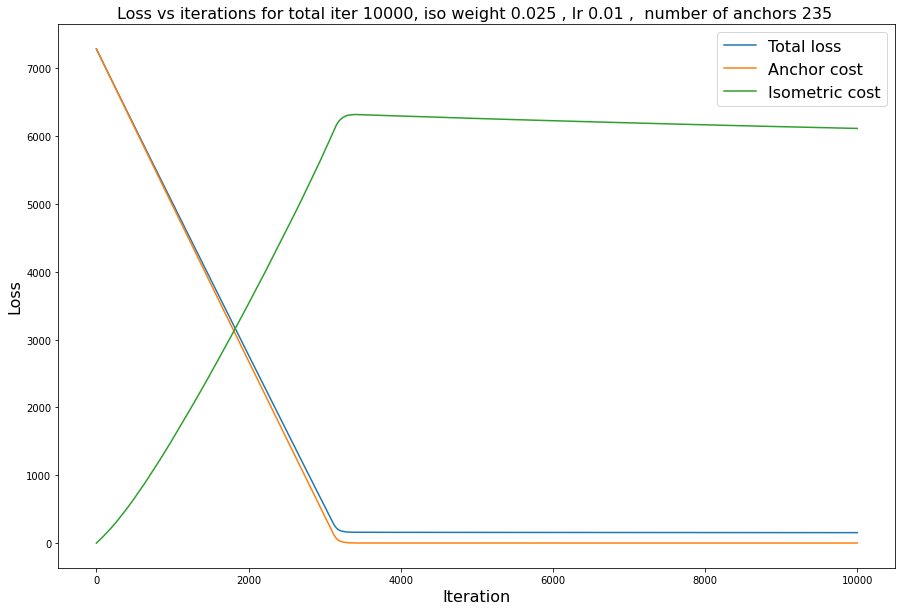

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.plot(total_loss, label="Total loss")
ax.plot(C_1, label="Anchor cost")
ax.plot(C_2, label="Isometric cost")
ax.legend(fontsize="16")
ax.set_xlabel("Iteration", fontsize="16")
ax.set_ylabel("Loss", fontsize="16")
ax.set_title(f'Loss vs iterations for total iter {Niter}, iso weight {weight} , lr {learn} ,  number of anchors {len(anchor_verts_idx)} ', fontsize="16");
#ax.set_title('My subtitle',fontsize=16);


In [ ]:
meshes = Meshes(
        verts=[V,verts],
        faces=[faces,faces],
    )

# Render the plotly figureanchor_cost(vert_id,user_vert_id)
from sklearn.neighbors import NearestNeighbors
fig = plot_scene({
        f"Mesh deformation with parameters : total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ": {
            "liver": meshes,     # blue
            "liver_deformed": new_src_mesh    # red
        }
    })
fig.show()

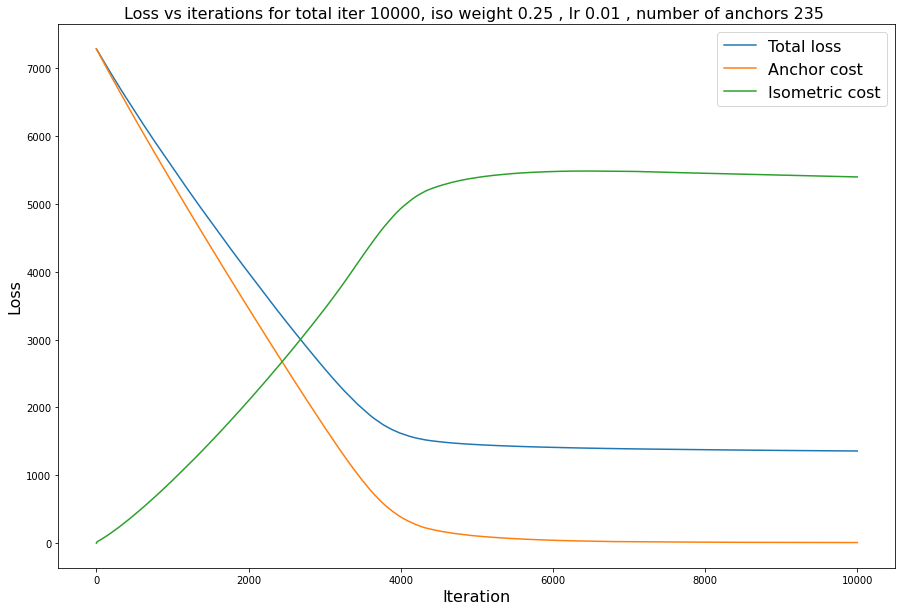

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.plot(total_loss, label="Total loss")
ax.plot(C_1, label="Anchor cost")
ax.plot(C_2, label="Isometric cost")
ax.legend(fontsize="16")
ax.set_xlabel("Iteration", fontsize="16")
ax.set_ylabel("Loss", fontsize="16")
ax.set_title(f'Loss vs iterations for total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ', fontsize="16");
#ax.set_title('My subtitle',fontsize=16);


In [ ]:
meshes = Meshes(
        verts=[V,verts],
        faces=[faces,faces],
    )

# Render the plotly figureanchor_cost(vert_id,user_vert_id)
from sklearn.neighbors import NearestNeighbors
fig = plot_scene({
        f"Mesh deformation with parameters : total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ": {
            "liver": meshes,     # blue
            "liver_deformed": new_src_mesh    # red
        }
    })
fig.show()

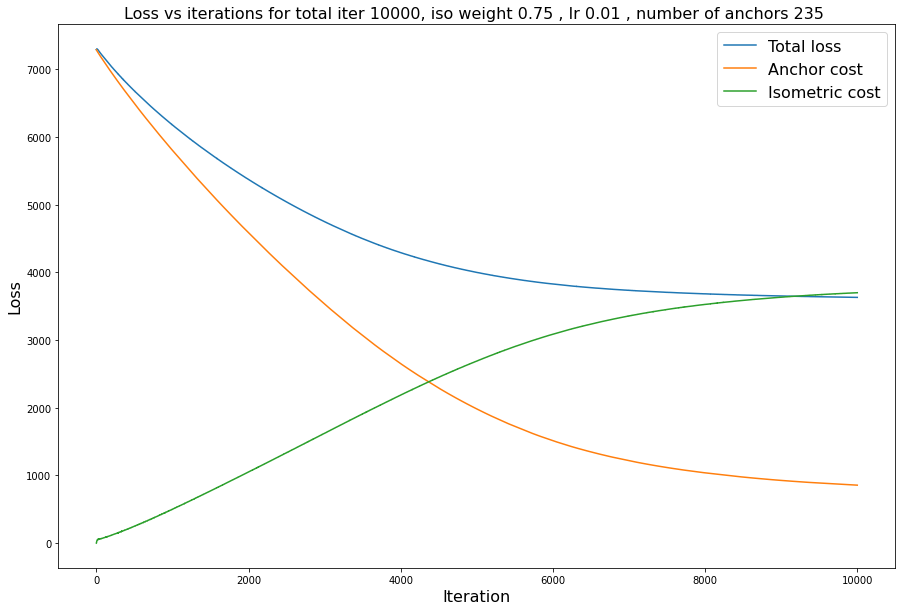

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.plot(total_loss, label="Total loss")
ax.plot(C_1, label="Anchor cost")
ax.plot(C_2, label="Isometric cost")
ax.legend(fontsize="16")
ax.set_xlabel("Iteration", fontsize="16")
ax.set_ylabel("Loss", fontsize="16")
ax.set_title(f'Loss vs iterations for total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ', fontsize="16");
#ax.set_title('My subtitle',fontsize=16);


In [ ]:
meshes = Meshes(
        verts=[V,verts],
        faces=[faces,faces],
    )

# Render the plotly figureanchor_cost(vert_id,user_vert_id)
from sklearn.neighbors import NearestNeighbors
fig = plot_scene({
        f"Mesh deformation with parameters : total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ": {
            "liver": meshes,     # blue
            "liver_deformed": new_src_mesh    # red
        }
    })
fig.show()

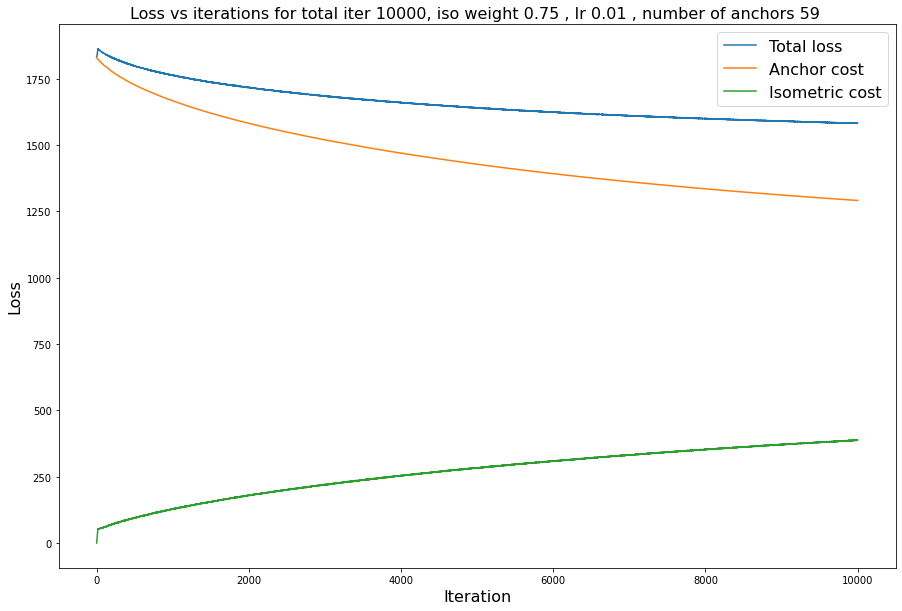

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.plot(total_loss, label="Total loss")
ax.plot(C_1, label="Anchor cost")
ax.plot(C_2, label="Isometric cost")
ax.legend(fontsize="16")
ax.set_xlabel("Iteration", fontsize="16")
ax.set_ylabel("Loss", fontsize="16")
ax.set_title(f'Loss vs iterations for total iter {Niter}, iso weight {weight} , lr {learn} , number of anchors {len(anchor_verts_idx)} ', fontsize="16");
#ax.set_title('My subtitle',fontsize=16);


In [ ]:
#"""

# make the frozen vertices in deformed mesh to return to original positions 

for id in range(len(frozen_vert_idx)):
  V[frozen_vert_idx[id]] = verts[frozen_vert_idx[id]]

#"""
